# Installing libraries

In [1]:
!pip install autograd numpy scipy matplotlib pandas sklearn

  Obtaining dependency information for autograd from https://files.pythonhosted.org/packages/6d/90/d13cf396989052cadd8511c1878b0913bbce28eeef5feb95710a92e03076/autograd-1.7.0-py3-none-any.whl.metadata
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 2
  
  [1348 lines of output]
    Obtaining dependency information for setuptools>=40.8.0 from https://files.pythonhosted.org/packages/da/bd/ac215d31c2904e47ec5332897442bdc19fd6b21a82068d057152f4e9c1cf/setuptools-75.8.1-py3-none-any.whl.metadata
    Obtaining dependency information for wheel from https://files.pythonhosted.org/packages/0b/2c/87f3254fd8ffd29e4c02732eee68a83a1d3c346ae39bc6822dcbcb697f2b/wheel-0.45.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   

# Load libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Loading dataset

* You can use url to import files directly from sites given there is internet connection.
* You could also use download and use local files by directing to path in quotes, same as url
* Variable names is used to create a first row of column names as our data doesn't have

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names = names)

# SUMMARY OF TOP 5 ROWS

* This illustrates the top rows in our dataset in its raw form.

In [19]:
df = dataset
print(df)

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


# Identifying classes within our dataset

In [37]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# DATASET SHAPE
* Our data consists of 150 rows and 5 columns

In [29]:

print(f"Data shape: ",dataset.shape)
print("Summary of the Iris dataset: ")
print(dataset.describe())

Data shape:  (150, 5)
Summary of the Iris dataset: 
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# Visualising each attrtibute through univariate plots

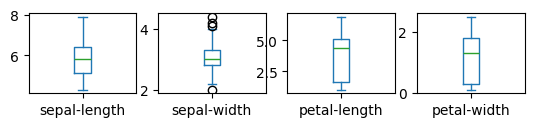

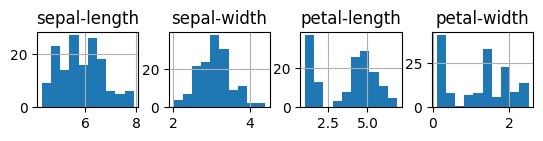

In [42]:
dataset.plot(kind = 'box', subplots = True, layout=(4,4),sharex= False, sharey = False)
plt.show()

dataset.hist(layout = (4,4))
plt.show()

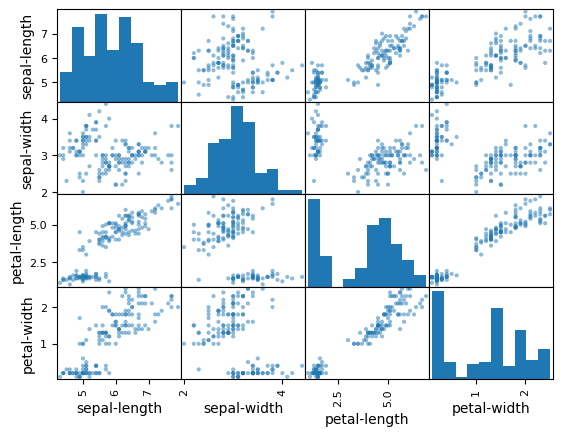

In [43]:
scatter_matrix(dataset)
plt.show()

# Creating a validation Dataset
* Helps data be able to predict accurately for unforeseen data

In [47]:
array = dataset.values
x = array[:,0:4]
y = array[:,4]

X_train, X_validation , Y_train, Y_validation = train_test_split(x,y, test_size = 0.20, random_state = 1)

In [61]:
models =[]
models.append(('LR',LogisticRegression(solver = 'liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []

print("Model comparison:")
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state =1, shuffle =True)
    cv_results = cross_val_score(model,X_train, Y_train, cv= kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Model comparison:
LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.040825)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


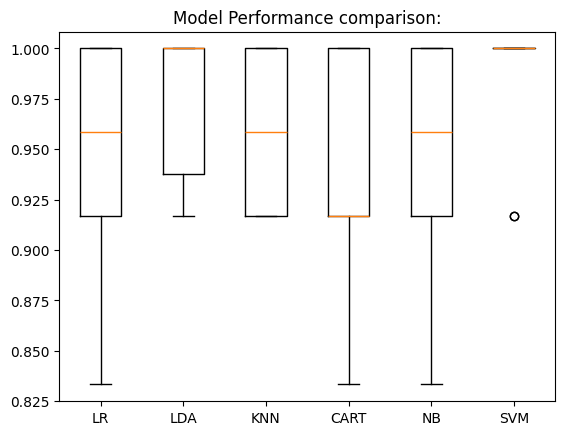

In [59]:
plt.boxplot(results, tick_labels = names)
plt.title("Model Performance comparison:")
plt.show()

In [64]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions), end="\n")
print(confusion_matrix(Y_validation, predictions), end="\n")
print(classification_report(Y_validation, predictions), end="\n")

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

